# Kernel Density Estimation

Kernel density estimation is a popular approach for estimating the underlying probability distribution of data in terms of the probability density function. The probability density function gives us the relative likelihood of different observations, and is a very useful tool in data analyis and exploration. For example, the density function can tell us whether the data is unimodal, bimodal, skewed, etc. The densities can be used as features in models. A common application is anomaly detection where the density function is used to determine how likely a new observation is relative to others. 

To understand density estimation in general, and kernel density estimation in particular, let us start with a dataset that contains the credit card transactions over the last six months for a single customer. There are 100 elements in the dataset and each element corresponds to the dollar amount of a credit card transaction. The data is shown below.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

amounts  = np.array([22.38, 26.25, 21.4 , 28.72, 13.24, 25.62, 17.71, 19.89, 22.7 ,
       19.56, 25.5 , 14.09, 13.62, 22.35, 17.43, 15.72,  9.73, 22.4 ,
       25.51, 19.76, 21.08, 26.96, 22.84, 15.49, 18.47, 27.23, 18.06,
       25.82, 25.4 , 19.86, 21.82, 22.17, 26.66, 20.1 , 26.02, 19.76,
       17.77, 27.74, 19.64, 14.66, 23.32, 18.95, 21.08, 20.88, 22.34,
       26.28, 21.79, 22.  , 18.93, 15.33, 11.33, 19.03, 19.31, 15.56,
       20.87, 15.26, 16.52, 18.47, 27.1 , 25.48, 11.55, 27.84, 11.03,
       20.2 , 17.37, 23.37, 18.8 , 16.95, 28.47, 16.76, 21.63, 17.85,
       17.16, 18.2 , 20.  , 22.02, 16.32, 15.34,  7.56, 21.77, 18.84,
       13.05, 26.12, 25.49, 16.29, 13.95, 22.61, 22.64, 11.08, 22.17,
       19.75, 21.57, 23.7 , 22.01, 19.84, 15.02, 14.65, 20.95, 20.69,
       16.94])

One way to summarize the above information is to create a histogram. In the code that follows, we first create 5 bins  that cover different ranges of dollar amounts (\$5 to \$9,99, \$10 to \$14.99, etc.), and then use the "hist" function to both count the number of transactions that fall into each bin and plot the histogram. The height of each bin in the histogram corresponds to the number of elements in that bin (these numbers are also conveniently returned by the hist function as shown in the output below). For example, there are two elements in the first bin (\$5 to \$9.99), 11 elements in the next (\$10 to \$14.99), 37 elements in the third bin, and so on.

(array([ 2., 11., 37., 31., 19.]),
 array([ 5, 10, 15, 20, 25, 30]),
 <a list of 5 Patch objects>)

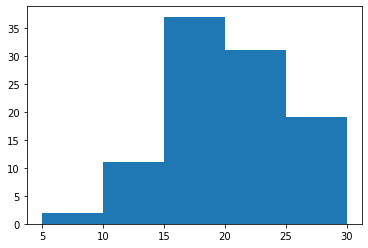

In [4]:
# create a histogram
bins = np.arange(5, 31, 5) # This produces the array [ 5, 10, 15, 20, 25, 30]. 
plt.hist(amounts, bins = bins)

Now, if we normalize the histogram such that the area under the histogram is 1, then we get a rough estimate of the probability density of the data (we discuss the probability density function in a little bit more detail below). To do this, we first divide the height of each bin by the total number of points in the entire dataset (100, in our example) and then divide the resulting number further by the width of each bin (5, in our case). The hist function does this for us automatically if we set the parameter "density" to True. This is shown below.

Text(0, 0.5, 'Probaility Density')

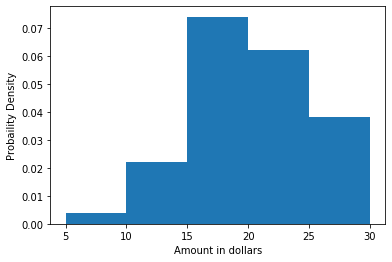

In [5]:
plt.hist(amounts, bins = bins, density=True)
plt.xlabel("Amount in dollars")
plt.ylabel("Probaility Density")

The probability density function gives us the relative likelihood of different observations. For example, the density that we estimated above tell us that it is about 3 times more likely for a transaction amount to lie in the interval \[20, 25) than the interval \[10, 15). We can use this information for anomaly detection: for example, a transaction amount of \$60 is very unlikely compared to an amount in the range, say, [15, 20] and so it is likely to be a fraudalant transaction (assuming that the 100 transactions in our dataset are representative of the user's purchasing behaviour).

The histogram provides a rough estimate of the density that is piece-wise constant. What if we want a smoother estimate? Well, we could fit a Gaussian to our data - that would work as long as the underlying density can be modeled with a Gaussian. How do we fit a Gaussian? A Gaussian has two parameters (mean and standard deviation) and we can estimate them as shown below.

In [6]:
amount_mean = np.mean(amounts)
amount_stddev = np.std(amounts)
print("mean = ", amount_mean)
print("std dev = ", amount_stddev)

mean =  19.985100000000003
std dev =  4.545832045951543


Having estimated the parameters of the Gaussian, we can create a of plot the density using the "stats" module from "scipy". To do that, we first instantiate a Gaussian with the mean and standard deviation calculated above. Next, we generate 100 values on the x-axis, compute the densities at those points using the Gaussian, and plot those values.

Text(0, 0.5, 'Probaility Density')

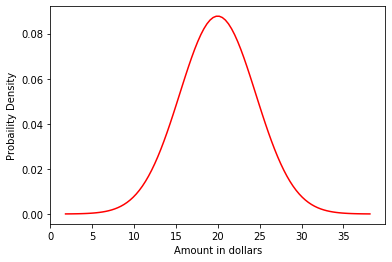

In [7]:
from scipy import stats

# Instantiate the Gaussian
G = stats.norm(loc=amount_mean, scale=amount_stddev)

# Generate 100 points along the x-axis on either side of the mean 
xx = np.linspace(amount_mean-4*amount_stddev, amount_mean+4*amount_stddev, 100) 

# Compute the densities at those 100 points
yy = G.pdf(xx) 

# Plot
plt.plot(xx, yy, c='r', label="G")
plt.xlabel("Amount in dollars")
plt.ylabel("Probaility Density")

We can overlay the Gaussian on the histogram as shown below.

Text(0, 0.5, 'Probaility Density')

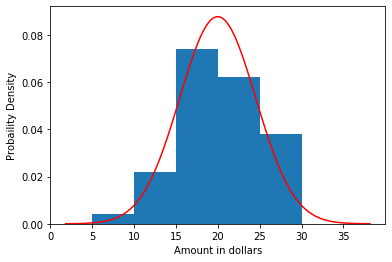

In [8]:
plt.hist(amounts, bins = bins, density=True)
plt.plot(xx, yy, c='r', label="G")
plt.xlabel("Amount in dollars")
plt.ylabel("Probaility Density")

The above approach to generating a smooth estimate of the density works as long as the underlying data can be modeled by a single Gaussian. But, what if the data is bimodal as shown by the histogram below? 

(array([0.002, 0.01 , 0.04 , 0.03 , 0.018, 0.   , 0.   , 0.008, 0.032,
        0.052, 0.008]),
 array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]),
 <a list of 11 Patch objects>)

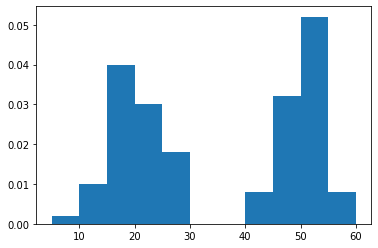

In [9]:
amounts2 = np.array([19.89, 22.34, 28.61, 23.03, 20.24, 18.43, 24.69, 26.54, 21.71,
       19.37, 22.08, 14.7 , 17.78, 25.24, 23.77, 18.87, 24.74, 16.86,
       23.33, 26.66, 23.15, 18.16, 19.79, 11.85, 19.06, 18.84, 22.89,
        9.07, 13.67, 17.36, 22.5 , 25.44, 12.68, 17.29, 25.79, 25.1 ,
       19.82, 16.18, 27.22, 21.67, 19.41, 22.18, 15.82, 16.07, 14.97,
       19.39, 16.76, 19.5 , 29.54, 23.48, 43.18, 51.7 , 47.72, 45.43,
       51.93, 42.88, 48.86, 47.01, 47.28, 49.33, 46.59, 46.55, 53.62,
       49.17, 51.52, 48.69, 53.51, 50.52, 45.78, 47.66, 44.11, 49.69,
       50.2 , 52.9 , 51.2 , 51.42, 50.48, 52.47, 53.27, 53.68, 49.41,
       52.13, 51.16, 54.65, 50.29, 50.97, 55.9 , 45.01, 49.62, 57.09,
       55.51, 50.23, 51.13, 44.93, 51.87, 56.45, 53.77, 50.85, 50.49,
       52.51])
plt.hist(amounts2, bins = np.arange(5, 61, 5), density=True) 

The above data is bimodal and a single Gaussian would not be a good fit. However, it looks like we can get a decent estimate of the density by fitting a mixture of two Gaussians, a technique that is covered in Chapter 9 - Gaussian Mixture Models. But what if we do not know the number of modes in our data or, worse, if the data cannot be modeled as a mixture of Gaussians? Kernel density estimation (KDE) is a technique that will produce a smooth density estimate irrespective of the underlying distribution. Depending the kernel used (more about this later), we get different estimates for the same data. An estimate for the above data using the Gaussian kernel is shown below in Figure 1.

Before we learn how KDE works, let us revisit the histogram based approach and look at how we can make the histogram a little bit smoother. In other words, we want to see how can we lessen the abrupt changes in the height of the histogram as we move from one bin to the next. This will lead us directly to KDE.

Let us consider a very simple dataset of 5 numbers: x = \[8, 6, 7, 21, 22]. A histogram of this data using the bins [5,10), [10,15), [15,20) and [20,25] is shown below in Figure 2(a) where the 5 observations (i.e., data points) are plotted as little colored dots. For the purpose of this discussion, let us assume that each observation contributes a block of height 1 to the bin in which it lies as shown on Figure 2 (b). For example, there are three observations in the first bin, each contributing a block, and hence the height of the first bin is 3. Similalry there are two observations in the last bin, each contributing a block and so height of the last bin is 2. Note that we are working with the unnormalized histogram - we can easily normalize it to get an estimate of the probability density.


The above histogram has abrupt changes in height as we move from one bin to the next. We can lessen these changes by getting rid of the bins altogether, and have each observation contribute a block centered horizontally around that observation. This is shown in Figure 3. For example, the red dot, located at $amount~=~6$, contributes a block of the same height and width as before (height = 1, width = 5), but that block is centered horizontally at $amount~=~6$, i.e., it extends horizontally from 3.5 to 8.5. Similarly, the blue dot contributes a block centered horizontally at $amount~=~7$, and so on.

Now, to compute the $unnormalized$ density at any arbitrary point on the x-axis, we just sum up the heights of the blocks that cover that point. This is shown in Figure 4. For example, to compute the density at x = 5, we sum up the heights of the blocks that cover x=5 in Figure 3; there are two blocks that cover x=5, and hence the unnormalized density at x=5 is estimated as 2. Similalry, 3 blocks cover x=8 and hence the unnormalized density at x=8 is 3. No blocks cover x=15 and so the unnormalized density there is 0. Clearly, this estimate looks better than the histogram-based estimate. It captures the fact that the observations are spaced apart and it does not have the abrupt changes caused by binning (or, at least, those changes are not as severe).

Finally, to obtain an estimate of the probability density, we simply normalize the height so that the area under the curve is 1. The normalized version is shown in Figure 5. We will soon learn about generating such plots using scikit-learn.


What we just saw is an example of kernel density estimation. The box is referred to as the kernel. Instead of a box-shaped kernel, we could try kernels of other shapes. The Gaussian kernel is a popular choice and it produces smoother estimates. An estimate based on the Gaussian kernel is shown below.

Kernel density estimation using the Gaussian kernal works exatly the same way as the estimation using the box kernel: we place a Gaussian kernel centered at each observation and just sum up the values of those Gaussians (and normalize). An example is shown in Figure 6. There are 5 observations and so we have 5 Gaussians, each centered around an observation. To compute the unnormalized density at, say, $amount=25$, we add the values of the 5 Gaussians at that position. The left three Gaussians are practically zero at $amount=25$, the teal Gaussian has a value of 0.044, and the megenta Gaussian has a value of 0.078. Summing those values, we get an unnormalized estimate of 0.122 for the density at $amount=25$.


So far, we conveniently left out an important aspect of kernel density estimation: the kernel size. For the box kernel, we used a box of width of 5, and for the Gaussian kernel we used a Gaussian with a standard deviation of 2.5. As you might expect, different values for the kernel size would produce different estimates. When the kernel size is large, each observation exerts its influence over a larger region and vice versa. Figure 7 shows the density estimate for the same dataset with a narrow Gaussian kernel (standard deviation = 0.2) and Figure 8 shows the density estimate with a wide kernel (standard deviation = 5). As you can see, the wider the kernel, the smoother the estimate.


How do we detemine the kernel size? One approach is to leave out a small portion of the data as a validation set and perform KDE on the remaining data for different values of kernel size. Then we compute the likelyhood of the validation data for each of those estimates and choose the kernel size that produces the largest likelyhood. In scikit-learn, you can do this using "GridSearchCV".

We turn to the scikit-learn implementation of KDE next.

## Kernel Density Estimation in SKLearn

In this section, we look at KDE in scikit-learn. Let us start with the import first.

In [10]:
from sklearn.neighbors import KernelDensity

Let us work with the "amounts2" data that we saw earlier. Let us call it "x" for convenience.

In [11]:
x = amounts2
x

array([19.89, 22.34, 28.61, 23.03, 20.24, 18.43, 24.69, 26.54, 21.71,
       19.37, 22.08, 14.7 , 17.78, 25.24, 23.77, 18.87, 24.74, 16.86,
       23.33, 26.66, 23.15, 18.16, 19.79, 11.85, 19.06, 18.84, 22.89,
        9.07, 13.67, 17.36, 22.5 , 25.44, 12.68, 17.29, 25.79, 25.1 ,
       19.82, 16.18, 27.22, 21.67, 19.41, 22.18, 15.82, 16.07, 14.97,
       19.39, 16.76, 19.5 , 29.54, 23.48, 43.18, 51.7 , 47.72, 45.43,
       51.93, 42.88, 48.86, 47.01, 47.28, 49.33, 46.59, 46.55, 53.62,
       49.17, 51.52, 48.69, 53.51, 50.52, 45.78, 47.66, 44.11, 49.69,
       50.2 , 52.9 , 51.2 , 51.42, 50.48, 52.47, 53.27, 53.68, 49.41,
       52.13, 51.16, 54.65, 50.29, 50.97, 55.9 , 45.01, 49.62, 57.09,
       55.51, 50.23, 51.13, 44.93, 51.87, 56.45, 53.77, 50.85, 50.49,
       52.51])

In [12]:
len(x)

100

Let's plot the histogram again for easy reference.

(array([0.002, 0.01 , 0.04 , 0.03 , 0.018, 0.   , 0.   , 0.008, 0.032,
        0.052, 0.008]),
 array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]),
 <a list of 11 Patch objects>)

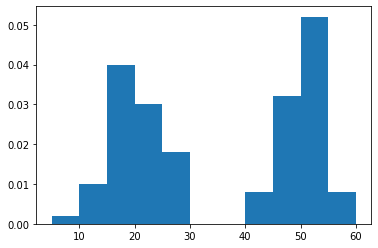

In [13]:
plt.hist(amounts2, bins = np.arange(5, 61, 5), density=True) 

Computing a kernel density estimate is as simple as instantiating a "KernelDensity" object and calling its "fit" method.

In [14]:
# Instantiate
kde = KernelDensity(kernel='gaussian', bandwidth=5)

# Fit. We need to reshape the 1-D array x into 2-D first
kde.fit(x.reshape(-1, 1))

KernelDensity(algorithm='auto', atol=0, bandwidth=5, breadth_first=True,
              kernel='gaussian', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)

The first parameter specifies the type of kernel we want and the second parameter specifies its size (see below). There are 6 available kernels in sklearn - their names and shapes are shown in Figure 9. The box kernel is referred to as the top-hat kernel in sklearn and you would specify it as "tophat".

The bandwidth parameter specifies the half-width for the tophat kernel, the standard deviation for the Gaussian kernel and so on.

Having fit the model to the data, we can calculate the density at specific points using the "score_samples" which returns the logarithm of the densities. We show this in the next few cells where we compute the log-densities at the points 20, 22 and 29.

**Note**: In what follows, we use the terms _density_ and _likelihood_ interchangeably.

In [15]:
# Let us evaluate the densities at three points 20, 22 and 29.
# Start by creating an containing those points
test_samples = np.array([20, 22, 29]).reshape(-1,1)
test_samples

array([[20],
       [22],
       [29]])

In [16]:
# Use the score_samples function to get the log-densities
log_densities = kde.score_samples(test_samples)
log_densities

array([-3.52280412, -3.53836157, -4.29079525])

In [17]:
# If you want the densities instead of the log-densities, 
# compute the exponent of the values returned by score_samples
densities = np.exp(log_densities)
densities

array([0.02951655, 0.0290609 , 0.01369403])

Recall that the log-likelihood of a dataset is just the sum of the log-likelihoods of the individual data points. You can compute the log-likelihood of a dataset using the "score" method as shown below.

In [18]:
kde.score(test_samples)

-11.351960935170196

You can confirm that the above output is the same as the sum of the individual likelihoods as follows.

In [19]:
sum(log_densities)

-11.351960935170196

How do we create a plot of the density estimate? It is easy. We just generate a range of x-values, compute the densities at those values and use matplotlib's plot function. This is shown below.

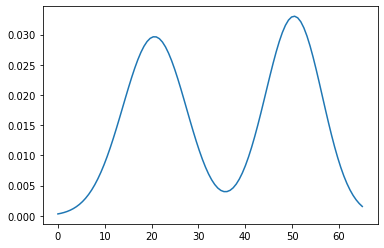

In [20]:
# Our data values lie in the range [9.07, 57.09]. i.e., x.min() = 9.07 and x.max() = 57.09
# Let create a plot that covers the range [0, 65]
# Generate 100 evenly spaced points in the range [0, 65]
xx = np.linspace(0, 65, 100)

# Let us compute the densities at those 100 points. Note the use of np.exp to convert log-densities to densities
yy = np.exp(kde.score_samples(xx.reshape(-1,1)))

# Plot
plt.plot(xx, yy)

Let's repeat the process with a smaller bandwidth. 

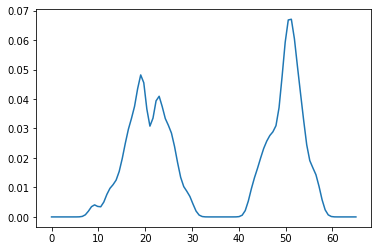

In [21]:
kde = KernelDensity(kernel='gaussian', bandwidth=1)
kde.fit(x.reshape(-1, 1))

# Plot
xx = np.linspace(0, 65, 100)
yy = np.exp(kde.score_samples(xx.reshape(-1,1)))
plt.plot(xx, yy)

### Exercise 1

Try running the above code with different values of bandwidth and different kernels. You can find the kernel names in Figure 9.

### Choosing the right bandwidth using GridSearch

As we just saw, different values for the bandwidth parameter produce different density estimates. How to we find the right bandwidth? One approach is to split the data into a "training" set and a "validation" set (we use the term "training" eventhough there is no training in the traditional sense), perform KDE on the training set for different values of bandwidth and evaluate the resulting estimates on the validation set. The bandwidth that maximizes the log likelyhood of the validation set (recall the "score" method discussed earlier) can be chosen as the best bandwidth to use. Scikit-Learn provides GridSearchCV which uses [cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html) to pick the best value.

The following code segment shows how to use GridSearchCV. There are four steps to this process - the comments in the code explain each step in detail.

In [22]:
from sklearn.model_selection import GridSearchCV

# STEP 1:
# Create a dictionary of key-value pairs. The keys are the parameters to optimize and
# the value corresponding to each key is a list that contains the parameter values to search over. 
# The following dictionary has one key ('bandwidth') and the corresponding value is the list [1, 2, 3, ..., 10].
# GridSearchCV will try all those values for the bandwidth and pick the best one.
# If you also want to find the best value for another parameter, say, kernel, look at the example in the next cell.
param_dict = {'bandwidth': np.arange(1, 11, 1)}

# STEP 2:
# Instantiate GridSearchCV.
# The first parameter specifies the model whose parameters we are trying to optimize.
# The second parameter is a dictionary as described above
# The third parameter specifies the number of folds to use during cross validation (if you do not know what this means, please refer to the "cross-validation" reference above)
gridsearch = GridSearchCV(KernelDensity(kernel='gaussian'), param_dict, cv=5); 

# STEP 3:
# Let gridsearch search over the parameter values you specified.
gridsearch.fit(x.reshape(-1, 1))

# STEP 4:
# Print out the best values for the parameters.
print(gridsearch.best_params_)

{'bandwidth': 3}


The above output shows that the best value for bandwidth (among those we specified) is 3. 

The next cell shows how to search for two parameters ("bandwidth" and "kernel") at the same time. Note that "param_dict" now has two keys, and the first parameter to GridSearchCV is now "KernelDensity( )" instead of "KernelDensity(kernel='gaussian')".

In [23]:
# STEP 1:
# Create a dictionary of key-value pairs. The keys are the parameters to optimize and
# the value corresponding to each key is a list that contains the parameter values to search over. 
# The following dictionary has two keys: 'bandwidth' and 'kernel'. 
# The value for the first key is the list [1, 2, 3, ..., 10].
# The value for the second key is the list ['gaussian', 'tophat', 'epanechnikov']
# GridSearchCV will try the specified values for bandwidth and kernel.

param_dict = {'bandwidth': np.arange(1, 11, 1), 'kernel': ['gaussian', 'tophat', 'epanechnikov']}

# STEP 2:
# Instantiate GridSearchCV.
# The first parameter specifies the model whose parameters we are trying to optimize.
# The second parameter is a dictionary as described above
# The third parameter specifies the number of folds to use during cross validation (if you do not know what this means, please refer to the "cross-validation" reference above)
gridsearch = GridSearchCV(KernelDensity(), param_dict, cv=5); 

# STEP 3:
# Let gridsearch search over the parameter values you specified.
gridsearch.fit(x.reshape(-1, 1))

# STEP 4:
# Print out the best values for the parameters.
print(gridsearch.best_params_)

{'bandwidth': 3, 'kernel': 'gaussian'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


The above output shows that the best option for 'kernel' (among the three values we specified) is 'gaussian' and the best value for bandwidth (among the 10 values we specified) is 3.

Let us fit a KDE with those parameter values and plot the density.

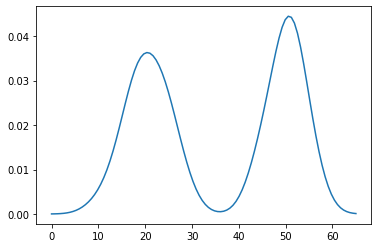

In [24]:
kde = KernelDensity(kernel='gaussian', bandwidth=3)
kde.fit(x.reshape(-1, 1))

# Plot
xx = np.linspace(0, 65, 100)
yy = np.exp(kde.score_samples(xx.reshape(-1,1)))
plt.plot(xx, yy)

### KDE in Higher Dimensions

All the examples we have seen so far are one-dimensional (each observation is made up of a single feature) but the ideas extend directly to high dimensions (each observation is made up of multiple features). In 2D, for example, we place a 2D Gaussian at each observation, and the density at any given point is the sum of the values of all those Gaussians at that point. 

We illustrate 2D KDE with a toy example below. In the next chapter, we will see a Capital One use case, where we perform 2D KDE on a set of (latitude, longitude) values of credit card transaction locations, and use that to determine the relative probability of a transaction happening at a given location.

Let us start by generating some 2D date and plotting it.

Text(0, 0.5, 'x2')

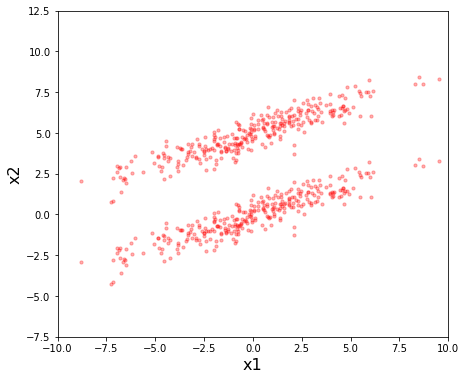

In [25]:
# Generate 300 data points that are Gaussian distributed with mean and covariance as given below.
n = 300
mean = [0, 0]
covar = np.array([[10, 4],[4, 2]])
X = np.random.multivariate_normal(mean, covar, n)

# Let us create another 300 points by adding a vertical offet to the previous points
Y = X + [0, 5]

# Stack the two datasets together to create a new dataset of 600 points
X = np.vstack((X, Y))

# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:,0], X[:,1], alpha=0.3, s=10, c='red')

xmin, xmax = -10, 10
ymin, ymax = -7.5, 12.5
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel("x1", fontsize=16)
plt.ylabel("x2", fontsize=16)


We can fit a 2D KDE to the above dataset as follows.

In [26]:
kde = KernelDensity(kernel='gaussian', bandwidth=1)
kde.fit(X)

KernelDensity(algorithm='auto', atol=0, bandwidth=1, breadth_first=True,
              kernel='gaussian', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)

We can plot the 2D KDE as shown below where we first generate a set of (x,y) coordinates sampled along an evenly spaced grid, evaluate the density at those locations (using the "score_samples" methods) and then plot those values using "pcolormesh". In the output, the darker the blue, the higher the density.

**Note:** If you are not familiar with the "meshgrid" function below, change "stepsize" to 5 and print "xx", "yy" and "xy" to figurte out what is going on. The idea is to sample the density along a fine mesh of evenly spaced points.

Text(0.5, 1.0, 'KDE in 2D')

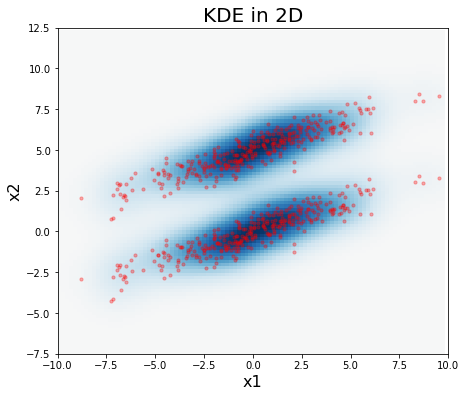

In [27]:
# Create a set (x, y) pairs sampled along an evenly spaced grid
stepsize = 0.2
xmin, xmax = -10, 10
ymin, ymax = -7.5, 12.5
xx, yy = np.meshgrid(np.arange(xmin,xmax,stepsize), np.arange(ymin,ymax,stepsize))
xy = np.array([xx.ravel(), yy.ravel()]).T

# Evaluate the density at the above (x,y) pairs.
z = np.exp(kde.score_samples(xy))
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
zz = z.reshape(xx.shape) # Reshape the result so we can use it with "pcolormesh" below.

# Plot
plt.figure(figsize=(7,6))
plt.pcolormesh(xx, yy, zz, cmap='RdBu', vmin=z_min, vmax=z_max)
plt.scatter(X[:,0], X[:,1], alpha=0.3, s=10, c='red')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel("x1", fontsize=16)
plt.ylabel("x2", fontsize=16)
plt.title("KDE in 2D", fontsize=20)

The previous density estimate was done with a bandwidth of 1. Let's change the bandwidth to 2 and see what happens.

Text(0.5, 1.0, 'KDE in 2D')

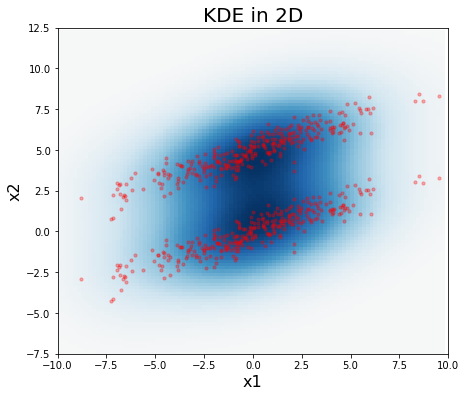

In [28]:
kde = KernelDensity(kernel='gaussian', bandwidth=2)
kde.fit(X)

stepsize = 0.2
xmin, xmax = -10, 10
ymin, ymax = -7.5, 12.5
xx, yy = np.meshgrid(np.arange(xmin,xmax,stepsize), np.arange(ymin,ymax,stepsize))
xy = np.array([xx.ravel(), yy.ravel()]).T

z = np.exp(kde.score_samples(xy))
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
zz = z.reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.pcolormesh(xx, yy, zz, cmap='RdBu', vmin=z_min, vmax=z_max)
plt.scatter(X[:,0], X[:,1], alpha=0.3, s=10, c='red')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel("x1", fontsize=16)
plt.ylabel("x2", fontsize=16)
plt.title("KDE in 2D", fontsize=20)

### Exercise 2: 
Change the bandwidth parameter above to different values (0.1, 0.5, 2.5, 3.0, etc) and plot the resulting density. Make sure you understand the results. Essentially, as the bandwidth increases, each data point, exerts its influence over a larger region of the feature space.

### Exercise 3:
Use grid search to determine the best bandwidth and plot the corresponding estimate.

## KDE as a Generative Model

Given a density estimate, we can use it to generate new samples that reflect the underlying data distribution (assuming that the estimate is a good representation of the distribution). For example, given a dataset containing a customer's past transactions, we can fit a KDE and use that KDE to generate new transactions that follow the same pattern as the original. If the real data is bimodal, the artificially generated data will also be bimodal. In fact, you can generate as many new datasets as you want and use those in creative ways. For example, if the original data corresponds to fradulant behavior (or, in the cyber-security domain, a network invasion), we can use the synthetic datasets as additional data for training or testing our models.

Let us illustrate the process of generating new samples using the amounts2 data that we saw earlier. The data is printed below for convenience.


In [29]:
amounts2

array([19.89, 22.34, 28.61, 23.03, 20.24, 18.43, 24.69, 26.54, 21.71,
       19.37, 22.08, 14.7 , 17.78, 25.24, 23.77, 18.87, 24.74, 16.86,
       23.33, 26.66, 23.15, 18.16, 19.79, 11.85, 19.06, 18.84, 22.89,
        9.07, 13.67, 17.36, 22.5 , 25.44, 12.68, 17.29, 25.79, 25.1 ,
       19.82, 16.18, 27.22, 21.67, 19.41, 22.18, 15.82, 16.07, 14.97,
       19.39, 16.76, 19.5 , 29.54, 23.48, 43.18, 51.7 , 47.72, 45.43,
       51.93, 42.88, 48.86, 47.01, 47.28, 49.33, 46.59, 46.55, 53.62,
       49.17, 51.52, 48.69, 53.51, 50.52, 45.78, 47.66, 44.11, 49.69,
       50.2 , 52.9 , 51.2 , 51.42, 50.48, 52.47, 53.27, 53.68, 49.41,
       52.13, 51.16, 54.65, 50.29, 50.97, 55.9 , 45.01, 49.62, 57.09,
       55.51, 50.23, 51.13, 44.93, 51.87, 56.45, 53.77, 50.85, 50.49,
       52.51])

Let us first fit a KDE with a bandwidth of 5 and plot the density.

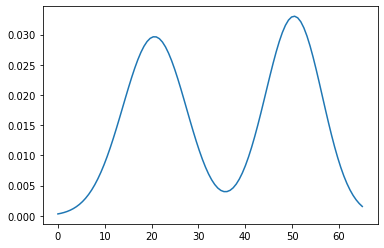

In [30]:
# Instantiate
kde = KernelDensity(kernel='gaussian', bandwidth=5)
# Fit. We need to reshape the 1-D array x into 2-D first
kde.fit(x.reshape(-1, 1))

# Our data values lie in the range [9.07, 57.09]. i.e., x.min() = 9.07 and x.max() = 57.09
# Let create a plot that covers the range [0, 65]
# Generate 100 evenly spaced points in the range [0, 65]
xx = np.linspace(0, 65, 100)

# Let us compute the densities at those 100 points. Note the use of np.exp to convert log-densities to densities
yy = np.exp(kde.score_samples(xx.reshape(-1,1)))

# Plot
plt.plot(xx, yy)

As can be seen from the above plot, the density is bimodal with peaks near 20 and 50, and it is practically zero for values outside the range \[0, 60\]. Thus, if we sample from this distribution, there will be a lot of samples closer to 20 or 50, and very few samples below 0 or above 60. 

To sample from this distribution, we use the "sample" method and specify the number of samples we want. The code in the next cell, samples 5 data points from the above density. 

In [31]:
kde.sample(n_samples=5, random_state=0)

array([[47.71637973],
       [59.53962224],
       [52.92059265],
       [49.4006173 ],
       [28.54600389]])

Let's generate 300 samples and print the first 100 values.

In [32]:
samples = kde.sample(n_samples=300, random_state=0)
print(samples[:100].T)

[[52.71253269 50.85090518 43.60341966 50.74039135  8.69969546 49.05340058
  13.35569262 59.17025023 47.98908784 31.12599051 61.15242272 37.37007487
  50.99129365 54.51454018 23.35281487 19.72364093 27.94559711 53.1610456
  50.92493515 36.62998097 56.61165782 59.07809296 12.6931787  45.93787836
  17.30532438 46.29106015 24.47976582 50.27335791 51.17769376 25.65374572
  19.26201311 45.55318022 11.47530801 51.9118969  16.39570371 44.01591823
  43.56842981 46.28716352 42.18860097 46.72389298 27.71945512 16.51211044
  46.10556914 25.17700083 55.50523173 36.65703622 27.93956154 19.73046661
  22.17795709 17.86523312 49.47870889 15.4894803  40.33657766 32.40246431
  22.59729671 29.84086356 45.22975076 26.52188527 18.19171844 22.10421917
  13.64373317 20.75572645 52.13909082 31.74923115 23.5195622  17.41486441
  62.67958349 14.06992089 53.9702515  25.05445681 51.33862484 19.6747684
  48.85275485 48.44027944 46.36736574 31.3206534  13.07917977 14.37910898
  20.69191541 12.39640106 18.76870764 15

We have just created a "fake" customer transactions dataset that has a similar distribution as the original "accounts2" data. Here is the histogram of the sampled data.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([0.00678848, 0.0158398 , 0.02319399, 0.01923404, 0.01470838,
        0.0079199 , 0.01470838, 0.03111389, 0.02489111, 0.01131414]),
 array([ 4.08190454,  9.97423586, 15.86656719, 21.75889852, 27.65122984,
        33.54356117, 39.4358925 , 45.32822383, 51.22055515, 57.11288648,
        63.00521781]),
 <a list of 10 Patch objects>)

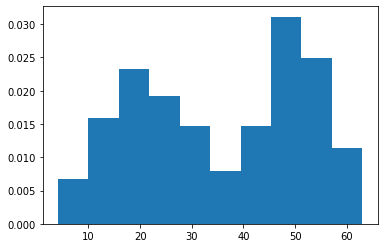

In [33]:
plt.hist(samples, normed=True)

### Generating synthetic hand-written digits

The scikit-learn documentation has an interesting example on using KDE as a generative model. The example uses a data set of hand-written digits where each digit is a square image of size 8x8, which, when flattened, yields an array of size 64. PCA is then used to reduce the dimensionality of the data from 64 to 15, and a KDE is fit to the resulting 15-dimensional data. Having fit a KDE, new samples are drawn from the distribution where each new sample is 15-dimensional. The 15-dimensional synthetic samples are then conveted back to the original 64-dimensional space and displayed. The resulting images look very much like hand-written digits. See [here](http://scikit-learn.org/stable/auto_examples/neighbors/plot_digits_kde_sampling.html#sphx-glr-auto-examples-neighbors-plot-digits-kde-sampling-py) for the complete example.   

## Speeding up computations

Kernel density estimation is computationally very expensive. This is not surprising given that the process involves placing a Gaussian at each observation and summing up their contributions. If there are 100,000 observations, then to compute the density at any given point, we have to essentially evaluate 100,000 Gaussians at that point and sum up the values. However, if we are willing to cut corners, then when evaluating the density at a given point, we can safely ignore Gaussians that are centered far away from that point because their values will be close to zero. Scikit-learn uses a tree-based data structure to speed up computations, and it also allows you to specify a tolerance level for the estimates - a larger tolerance will lead to faster execution but lower accuracy. There are two parameters to specify tolerance: "atol" and "rtol". The first specifies an absolute tolerance (default = 0), and the second specifies a relative tolerance (default = 1E-8). For more information, please refer to https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/. This blog post has a plot of computational time vs. relative tolerance. It also has brief discussion of the underlying data structure and the approximation used.

## Conclusions

Kernel density estimation is a popular approach for estimating the underlying probability density of the data. It is a non-parameteric approach in that it does not assume a parametric model for the density and it learns the shape of the underlying density automatically (subject to the bandwidth and kernel parameters we discussed above). KDE is a very useful tool in data analysis, and In the next chapter, we will look at a Capital One use case involving credit card fraud.